In [ ]:
import numpy as np

# makes printing more human-friendly
np.set_printoptions(precision=3, suppress=True)

In [ ]:
# Load the data
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    with open('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', 'r') as f:
      data = np.genfromtxt(f,delimiter=',')
else:
    with open('winequality-red.csv', 'r') as f:
        data = np.genfromtxt(f,delimiter=',')

X = data[1:,:-1]
y = data[1:,-1]-3
print('num_samples, num_features', X.shape)
print('labels', np.unique(y))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
num_samples, num_features (1599, 11)
labels [0. 1. 2. 3. 4. 5.]


In [ ]:
# Partition the data into Training and Testing (80:20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [ ]:
# Train the classification tree.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Test the trained decision tree
from sklearn.metrics import confusion_matrix, accuracy_score

y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
cm = confusion_matrix(y_test, y_hat)

print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
print("Confusion Matrix: ")
print(cm)

Accuracy: 59.69%
Confusion Matrix: 
[[ 0  0  1  1  0  0]
 [ 1  1  4  3  2  0]
 [ 2  5 99 27  2  1]
 [ 0  3 46 70  9  0]
 [ 0  0  6 12 21  1]
 [ 0  0  0  2  1  0]]


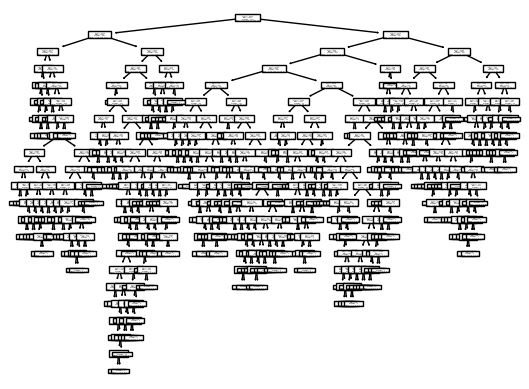

In [ ]:
# Plot a graph of the first trained classification tree.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(model)
plt.show()